In [4]:
cd("/home/jm2386/Active_Lattice/")
using DrWatson
@quickactivate "Active_Lattice"
include("/home/jm2386/Active_Lattice/src/pm_pdes.jl");
include("/home/jm2386/Active_Lattice/src/pm_sims.jl");
include("/home/jm2386/Active_Lattice/src/pm_plot.jl");
include("/home/jm2386/Active_Lattice/src/Hetrocline.jl");

v3.0
v4.0


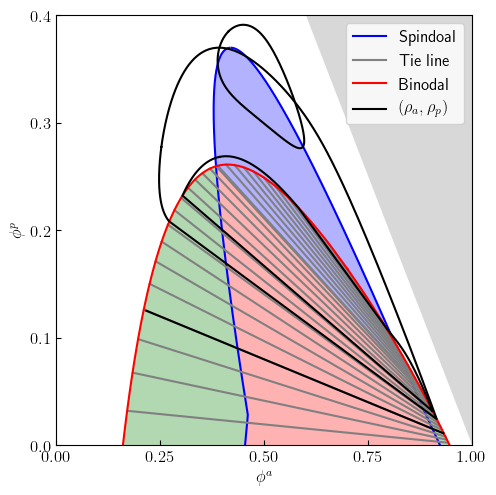

In [30]:
using PyPlot, LaTeXStrings
font = 12
fig, ax = subplots(1,1,figsize=(5,5))

plot_phase(fig, ax, 7.5, font; Lxs = [])

Lx, Nx, ϕa, ϕp, v0 = 100.0, 1024, 0.45, 0.35, 7.5
f,u,c = load_out_3(Lx,Nx,ϕa,ϕp,v0)
ax.plot(f[:,1]+f[:,2],f[:,3]; color = "black", label = L"(\rho_a, \rho_p)")

Lx,Nx,ϕa,ϕp,v0,ϕ,γ = 100.0, 1024, 0.3, 0.3, 7.5, 0.6, 1.4
f,u,c = load_out_5(Lx,Nx,ϕa,ϕp,v0,ϕ,γ)
ax.plot(f[:,1]+f[:,2],f[:,3]; color = "black")

Lx,Nx,ϕa,ϕp,v0,ind,γ = 100.0, 1024, 0.3, 0.3, 7.5, 780, 1.5
f,u,c = load_out_6(Lx,Nx,ϕa,ϕp,v0,ind,γ)
ax.plot(f[:,1]+f[:,2],f[:,3]; color = "black")

Pe = 7.5
filename = "/store/DAMTP/jm2386/Active_Lattice/data/binodal/Pe=$(Pe).jld2"
data = wload(filename)
@unpack Pe, γs, ϕ1s, ϕ2s = data
final_γ = 0.
                        final_ϕ1 = 0.
                        final_ϕ2 = 0.
                        for (γ, ϕ1, ϕ2) in zip(γs, ϕ1s, ϕ2s)
                            if (is_stable_value_finite(gamma_converter(γ, ϕ1)...; Pe = Pe, Lx=Lx)>0)|(is_stable_value_finite(gamma_converter(γ, ϕ2)...; Pe = Pe,Lx=Lx)>0)
                                final_γ = γ
                                final_ϕ1 = ϕ1
                                final_ϕ2 = ϕ2
                                break
                            end
                        end
                        ϕas_left, ϕas_right, ϕps = return_spin_finite(;Pe = Pe, Δϕ = 0.001,Lx=Lx)
            
                        # tie line
                        k = 20
                        γ = γs[k]
                        tie_line_x = -ϕps*γ/(γ-1).+1
                        xs = []
                        ys = []
                        for (x,y) in zip(tie_line_x,ϕps)
                            if (x+y ≥ ϕ1s[k])&(x+y ≤ ϕ2s[k])
                                push!(xs,x)
                                push!(ys,y)
                            end
                        end
ax.plot(xs,ys,color = "black")

ax.legend(loc = "upper right", fontsize=font)
display(fig)

In [31]:
#display(fig)
fig_name = "bin_spin_plot_3"
    pathname = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)";
    mkpath(pathname)
    filename = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)/bin_spins.pdf";
    PyPlot.savefig(filename,dpi = 100, format = "pdf") #bbox_extra_artists=( ldg,)
